Regresie Liniară
==============


* Tudor Berariu, Andrei Nica 2018

* Alexandru Sorici 2020

## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie liniară**, precum și a noțiunilor de _extragere de atribute (features)_ _complexitate a modelului_ și _regularizare_.

## 2. Problema de rezolvat

Problema de rezolvat în acest laborator este una de învățare supervizată, mai concret, de **regresie**. 

Fiind date eșantionări de puncte (samples) **(X, t)**, generate de o funcție necunoscută, se dorește construirea unui **model liniar** care să poată _potrivi_ setul de date **X** (să aproximeze funcția) și care să poată fi utilizat pentru a _evalua/prezice_ valori noi.

Vom explora trei aspecte ale problemei de **regresie liniara**:
* Regresie liniara simplă (potrivirea unei drepte)
* Regresie liniară folosind **extragere de atribute** (eng. feature extraction)
* **Regularizare**, **analiza complexității modelului de regresie** și **influența numărului de date de antrenare**

## 3. Regresie liniară simplă

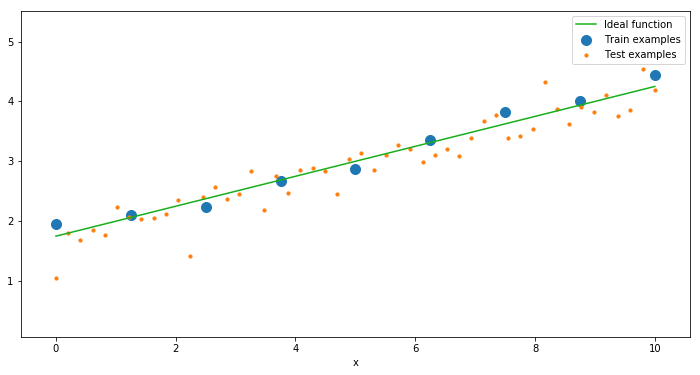

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N puncte de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$).
Pentru fiecare ${\bf x}^{(n)} \in X$ exista un $t^{(n)}$ reprezentand valoarea unei functii $f$ (necunoscute noua) in punctul ${\bf x}^{(n)}$, i.e. $t^{(n)} = f({\bf x}^{(n)})$.

Un model de regresie liniara simpla care doreste sa aproximeze functia $f$ este definit ca $${\bf y} = {\bf X} {\bf w} + b$$ unde ${\bf w}$ este un vector D-dimensional de ponderi, iar $b$ este termenul de bias.

In regresia liniara simpla se cauta solutia de **forma inchisa**:
$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf x^{(n)}} {\bf w} - t^{(n)}\right)^2$$
$${\bf w}^* = \left({\bf X}^\intercal {\bf X}\right)^{-1} {\bf X}^\intercal {\bf t} = {\bf X}^{\dagger} {\bf t}$$

unde ${\bf X^{\dagger}}$ este _pseudo inversa_ matricii ${\bf X}$.


## 4. Regresie liniara cu extragere de atribute

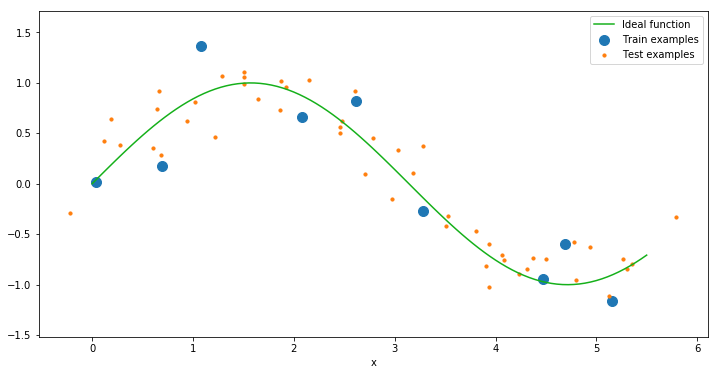

In unele cazuri, functia $f$ din care provine setul de date (**X, t**) nu este unul care sa poata fi aproximat printr-o simpla combinatie liniara a **spatiului de intrare** (i.e. a domeniului din care provine **X**).

Intr-un astfel de caz, spatiul de intrare poate fi _transformat_ intr-unul mai complex, avand o capabilitate de modelare mai bogata.
Acest lucru se face prin intermediul unor _functii de transformare_ $\phi$ care duc ${\bf x^{(n)}} \rightarrow \phi({\bf x^{(n)}})$.

Un exemplu il reprezinta functiile de **transformari polinomiale** de tipul:
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$
unde $M$ este gradul polinomului cu care se face transformarea.

Solutia de regresie liniara (in forma inchisa) devine atunci:


$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2$$


$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi}\right)^{-1} {\bf \Phi}^\intercal {\bf t} = {\bf \Phi}^{\dagger} {\bf t}$$

## 5. Regresie liniara cu regularizare

O solutie de optimizare in sensul celor mai mici patrate (ordinary least squares - OLS), cauta sa gaseasca _cea mai buna potrivire_ (best fit) pentru punctele din setul de date dat la antrenare.

Acest lucru duce la construirea unui estimator **unbiased**, i.e. modelul nu va prefera _prioritizarea_ unui feature (i.e. un anume $\phi^{(n)}$) in detrimentul altuia.
In plus, daca _modelul este complex,_  iar _datele de antrenare sunt putine,_ optimizarea OLS poate duce la fenomenul de **overfit** (i.e. modelul este prea specific pe datele de antrenare, dar nu are o evaluare buna pe date de test).

Un proces de **regularizare** are ca scop impunerea unei restrictii asupra parametrilor ${\bf w}$, astfel incat modelul sa poata da un bias acelor feature-uri care sunt mai relevante (importante) in construirea estimatorului.

Solutia de **regresie liniara cu regularizare L2** se scrie astfel:

$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 + \alpha {\bf w^T}{\bf w} \equiv \underset{{\bf w: w^Tw \leq t(\alpha)}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 $$ 

Solutia de forma inchisa pentru regresia liniara cu regularizare L2 (eng. Ridge Regression) este data prin:
$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi} + \alpha I \right)^{-1} {\bf \Phi}^\intercal {\bf t}$$


### Dependente

In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 388.9 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 6. Generare seturi de date

In [3]:
DATASET_TYPE = "linear" # linear, polinomial, sin

In [4]:
def generate_examples(dataset_type = "linear", N = 9, noise = 0.2, dist_noise = 0.2):
    if dataset_type == "linear":
        X = np.linspace(0, 10, N)
        t = X * 0.25 + 1.75 + np.random.randn(N) * noise
        X = np.reshape(X, (len(X), 1))
        return X, t
    
    elif dataset_type == "polinomial":
        X = np.linspace(-1.5, 5.5, N)
        X += np.random.randn(N) * dist_noise
        t = .25*X * X - X + 1 + np.random.randn(N) * noise
        X = np.reshape(X, (len(X), 1))
        return X, t
    
    elif dataset_type == "sin":
        X = np.linspace(0, 1.75 * np.pi, N)
        X += np.random.randn(N) * dist_noise
        t = np.sin(X) + np.random.randn(N) * noise
        X = np.reshape(X, (len(X), 1))
        return X, t
    
    else:
        raise ValueError("Unknown dataset type: " + dataset_type)

## 6. Cerinta 1: Implementare model de regresie liniara

### 6.1 Cerinta 1.1: Implementarea modelului general de regresie liniara [3 pct]

In [5]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w
        print(X.shape)
        N, D = X.shape
        self.w = np.zeros(D)
        # If the determinant of the matrix is zero it will not have
        # an inverse and your inv function will not work. This usually
        # happens if your matrix is singular. But pinv will. This is 
        # because pinv returns the inverse of your matrix when it is
        # available and the pseudo inverse when it isn't.
        # 𝐰∗ = 𝐗† 𝐭
        self.w = np.linalg.pinv(X) @ t
        # end 
        
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valori prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezise, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        # TODO codul vostru aici: calculati valoarea prezisa de modelul vostru
        N, D = X.shape
        y = np.zeros(N)
        
        y = X @ self.w
        # end codul vostru aici
        
        if return_std:
            # TODO codul vostru aici: intoarceti un vector de aceeasi dimensiune cu y, care 
            # are in fiecare pozitie o valoare egala cu deviatia standard a modelului antrenat (i.e. sqrt(var))
            y_std = np.zeros_like(y)
            
            y_std = np.sqrt(self.var)
            return y, y_std
        return y

### 6.2 Cerinta 1.2 Implementarea functiei de transformare polinomiala [1 pct]
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [6]:
def extract_polynomial_features(X, M):
    phi = X
    # TODO codul vostru aici: intoarceti valorile phi_n astfel incat pentru fiecare 
    # intrare x phi_n = [1, x, x^2, ..., x^M]
    return np.array([x ** np.arange(M + 1) for x in phi])
    # end
    
    # nota: phi trebuie sa fie la final un np.array de dimensiune (N, M+1), unde N este numarul de linii din X

### 6.3 Cerinta 1.3 Potrivirea unei drepte prin regresie liniara simpla [1 pct]

In [7]:
N_train = 10
N_test = 10
noise = 0.22

# X_train se genereaza ca np.array de dimensiune (N_train, 1) - de notat ca este de forma unei matrici
# t_train se genereaza ca np.array de dimensiune (N_train, ) - de notat ca este un vector, nu o matrice
# similar se genereaza si X_real si t_real, X_test si t_test

X_train, t_train = generate_examples(dataset_type="linear", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="linear", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="linear", N=N_test, noise=0.)


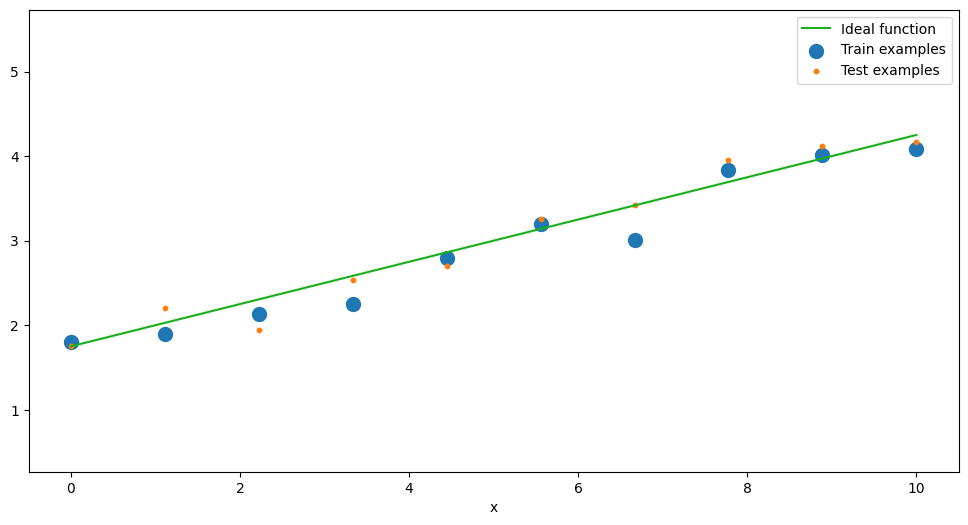

In [8]:
plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, t_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, t_train, s=100, label="Train examples")
plt.scatter(X_test, t_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

In [9]:
# TODO codul vostru aici:

# creati un model liniar
model = LinearRegression()

# Folositi functia extract_polynomial_features pentru a introduce termenul de bias in matricile X_train si X_test
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

# antrenati modelul vostru
model.fit(X_train_feat, t_train)

# obtineti predictia pe setul de antrenare si pe setul de test
y_train = np.zeros(X_train.size)
y_test = np.zeros(X_test.size)
y_test_std = np.zeros(X_test.size)
y_train = model.predict(X_train_feat)
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

(10, 2)


In [10]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

In [11]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

Train error: 0.02868757214693348
Test  error: 0.03954661065390254


#### Vizualizarea modelului invatat

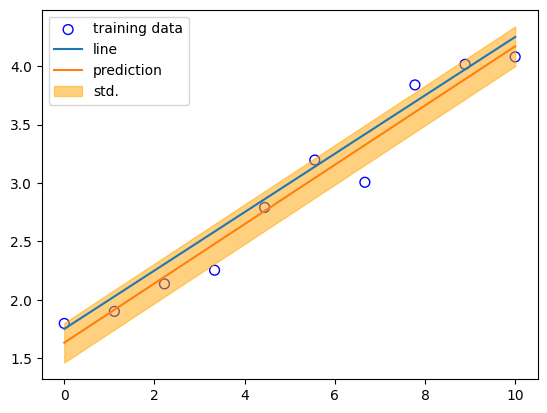

In [12]:
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 7. Cerinta 2.1: Implementare regresie liniara cu regularizare (Ridge Regression) [3 pct]

In [13]:
class RidgeRegression(LinearRegression):
    """
    Modelul de regresie liniara, folosind regularizare L2
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        super(RidgeRegression, self).__init__()
        self.alpha = alpha

        
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting), tinand cont si de regularizare
        Parameterii
        ----------
         X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        # TODO codul vostru aici: calculati vectorul de ponderi w, conform formulei de la punctul 5 
        N, D = X.shape
        self.w = np.zeros(D)
        # 𝐰∗ = (𝚽⊺𝚽 + 𝛼𝐼)^(−1)𝚽⊺𝐭
        phi_t = np.transpose(X)
        
        self.w = np.linalg.inv(phi_t @ X + self.alpha * np.identity(D)) @ phi_t @ t
        # end
        
        self.var = np.mean(np.square(X @ self.w - t))

## 7.1 Cerinta 2.2: Potrivirea functiei sin(x) cu feature-uri polinomiale [1 pct]

**Analizati** modelele de regresie liniara _cu_ si _fara_  regularizare. Ce concluzii se deduc din graficele de vizualizare si valorile functiei de eroare (MSE - mean squared error)

In [14]:
N_train = 10 #@param {type: "slider", default: 10, min: 10, max: 100}
N_test = 20
noise = 0.22

X_train, t_train = generate_examples(dataset_type="sin", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="sin", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="sin", N=100, noise=.0, dist_noise=.0)

### Folosirea unui model de regresie liniara, _fara_ regularizare

In [15]:
M = 15 #@param {type: "slider", default: 8, min: 1, max: 15}
X_train_feat = extract_polynomial_features(X_train, M)  # dimensiune X_train_feat - (N_train, M+1)
X_test_feat = extract_polynomial_features(X_test, M)    # # dimensiune X_test_feat - (N_test, M+1)

model = LinearRegression()
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

(10, 16)


#### Vizualizarea modelului invatat

Train error: 9.477680214863284e-13
Test  error: 17172.394817230055


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vlore\AppData\Local\Temp\ipykernel_21608\1216535878.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X_real, t_real, label="$\sin(2\pi x)$")


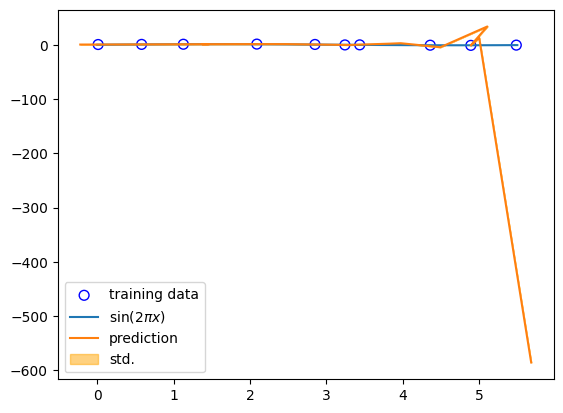

In [16]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

### Folosirea unui model de regresie liniara, _cu_ regularizare

In [17]:
model = RidgeRegression(alpha=1.75)
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vlore\AppData\Local\Temp\ipykernel_21608\1216535878.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X_real, t_real, label="$\sin(2\pi x)$")


Train error: 9.563088393080958
Test  error: 21453.645069890743


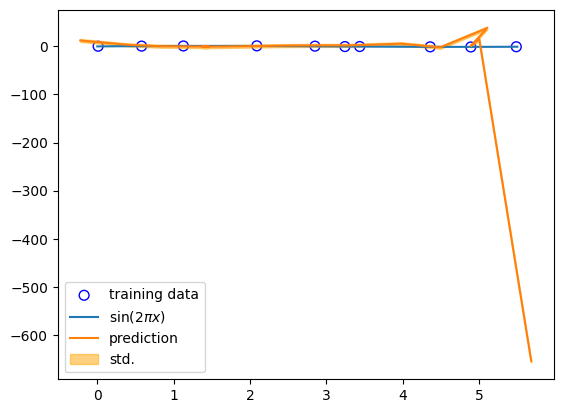

In [18]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    np.squeeze(X_test), y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 8. Cerinta 3: Vizualizarea curbelor de antrenare si testare [1 pct]

**Analizati** curbele de _antrenare_ si _testare_ pentru modele de regresie liniara _cu_ si _fara_ regularizare, de **complexitate** diferita (M diferit).

Discutati graficele rezultate:
* care este regimul de underfitting?
* care este regimul de overfitting?
* ce se intampla daca modificati numarul de date de antrenare (N_train) de la punctul 7.1? 

(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(10, 11)
(10, 12)
(10, 13)
(10, 14)
(10, 15)


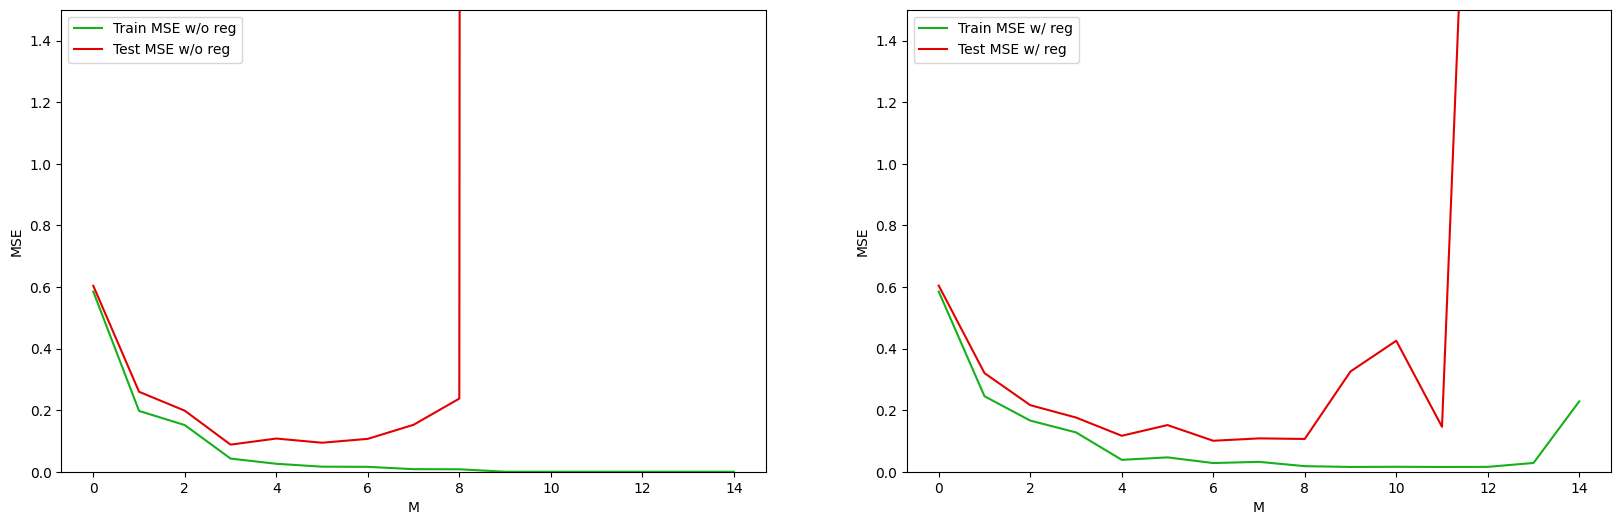

In [19]:
train_lin_mse = []
test_lin_mse = []

train_ridge_mse = []
test_ridge_mse = []

for M in range(15):
    X_train_feat = extract_polynomial_features(X_train, M)
    X_test_feat = extract_polynomial_features(X_test, M)
    
    model_linear = LinearRegression()
    model_ridge = RidgeRegression(alpha=1.75)
    
    model_linear.fit(X_train_feat, t_train)
    model_ridge.fit(X_train_feat, t_train)
    
    y_train_lin = model_linear.predict(X_train_feat)
    y_test_lin = model_linear.predict(X_test_feat)
    
    y_train_ridge = model_ridge.predict(X_train_feat)
    y_test_ridge = model_ridge.predict(X_test_feat)
    
    train_lin_mse.append(mean_squared_error(y_train_lin, t_train))
    test_lin_mse.append(mean_squared_error(y_test_lin, t_test))
    
    train_ridge_mse.append(mean_squared_error(y_train_ridge, t_train))
    test_ridge_mse.append(mean_squared_error(y_test_ridge, t_test))

plt.figure(figsize=(20,6))
# plot training/test curves depending on model size for LinearRegression
plt.subplot(1, 2, 1)
plt.plot(range(M+1), train_lin_mse, sns.xkcd_rgb["green"], label="Train MSE w/o reg")
plt.plot(range(M+1), test_lin_mse, sns.xkcd_rgb["red"], label="Test MSE w/o reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

# plot training/test curves depending on model size for RidgeRegression
plt.subplot(1, 2, 2)
plt.plot(range(M+1), train_ridge_mse, sns.xkcd_rgb["green"], label="Train MSE w/ reg")
plt.plot(range(M+1), test_ridge_mse, sns.xkcd_rgb["red"], label="Test MSE w/ reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

plt.show()




# overfitting - modelul este prea specific pe datele de antrenare,
# dar ajunge sa nu aiba o evaluare buna pe date de test, astfel
# are o eroare f mare pe datele de test (grafic 1)
    

